# Physics Applications Part 2

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint  
from scipy import integrate 
from pylab import imshow,show,gray

## 1. Computing Bessel functions.

### a

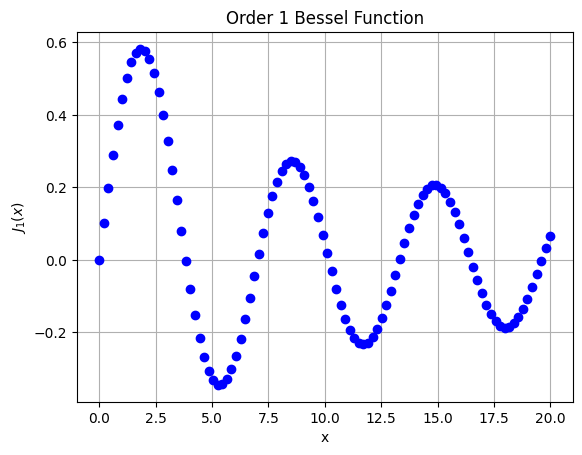

In [2]:
from scipy.special import j1
x=np.linspace(0,20,100)
y=j1(x)
plt.plot(x,y,'bo')
plt.title('Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_{1}(x)$')
plt.grid()

### b

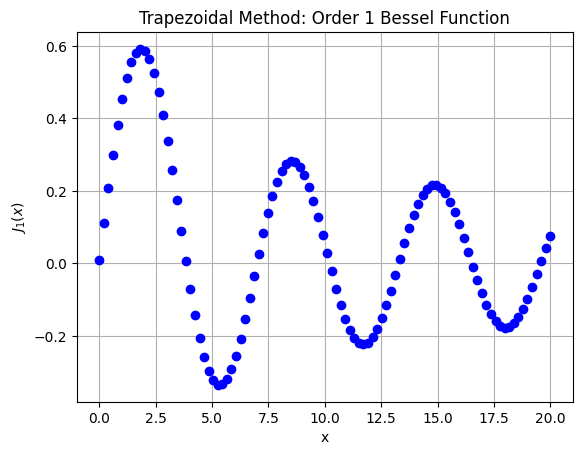

In [3]:
def J(u,x):
  return(1/np.pi)*np.cos(u-x*np.sin(u))
a=0
b=np.pi
n=100  
h=(b-a)/n
x=np.linspace(0,20,100)
trap = 0.5*(J(a,x)+J(b,x))
for i in range(n):
  trap += J(a+i*h,x)

y=trap*h

plt.plot(x,y,'bo')
plt.title('Trapezoidal Method: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()


#### i

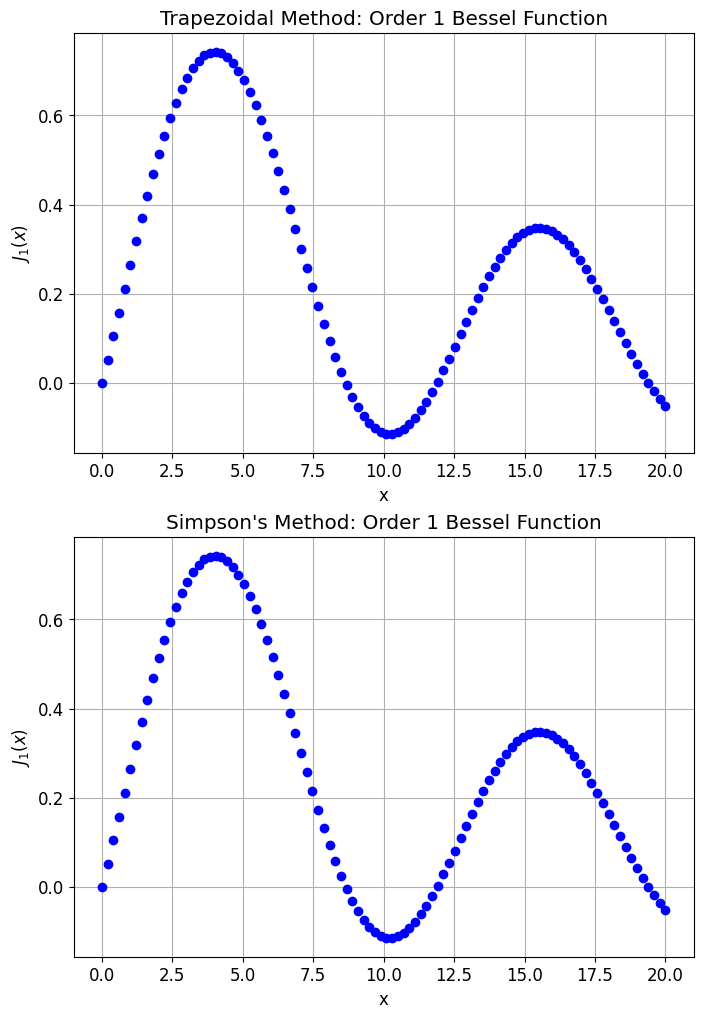

In [4]:
def trapezoid(f,a,b,nn,xx):
  u=np.linspace(a,b,nn+1)
  x=np.linspace(0,xx,nn+1)
  h=(b-a)/nn
  weights=np.ones(nn+1)
  weights[0]=0.5
  weights[-1]=0.5
  return h*sum(weights*f(u,x))

def simpsons(f,a,b,nn,xx):
  if nn%2 != 0:
    print('Simpons: inscreasing nn from',nn, 'to',nn+1)
    nn+=1
  u=np.linspace(a,b,nn+1)
  x=np.linspace(0,xx,nn+1)
  h=(b-a)/nn
  weights=4*np.ones(nn+1)
  weights[::2]=2
  weights[0]=1
  weights[-1]=1
  return (h/3)*sum(weights*f(u,x))

def J(u,x):
  return(1/np.pi)*np.cos(u-x*np.sin(u))

x = np.linspace(0,20,100)

def J_trap(x):
  return trapezoid(J,0,np.pi,100,x)

def J_simp(x):
  return simpsons(J,0,np.pi,100,x)

y_trap=[J_trap(x) for x in x]
y_simp=[J_simp(x) for x in x]

plt.figure(figsize=(8,12))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(x,y_trap,'bo')
plt.title('Trapezoidal Method: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()

plt.subplot(212)
plt.plot(x,y_simp,'bo')
plt.title('Simpson\'s Method: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()



### c

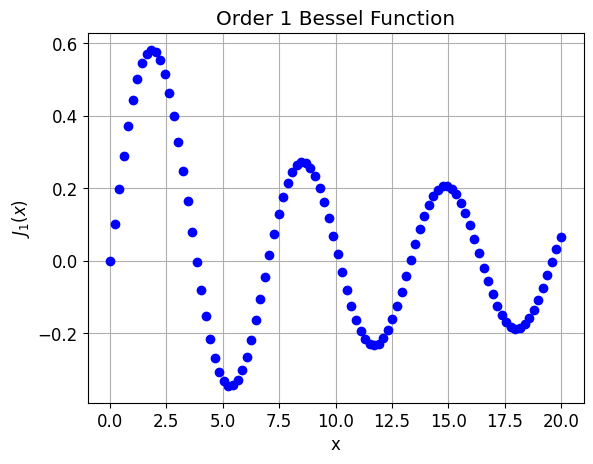

In [5]:
def J(u,x):
  return(1/np.pi)*np.cos(u-x*np.sin(u))

xvals = np.linspace(0,20,100)

def J_quad(x):
  return quad(J,0,np.pi,args=(x))[0]

yvals = [J_quad(x) for x in xvals] 

plt.plot(xvals,yvals,'bo')
plt.title('Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()

### d

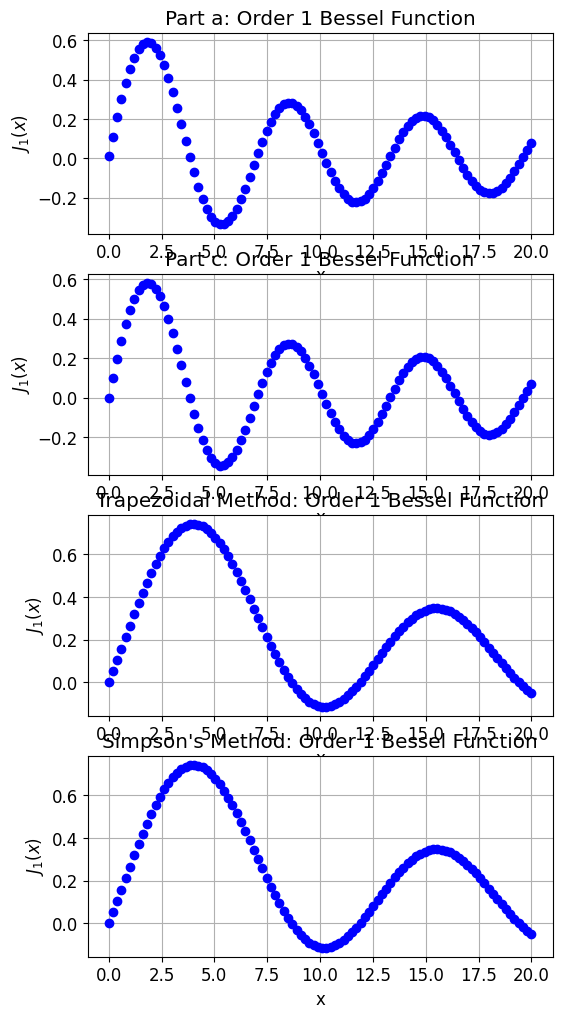

In [6]:
plt.figure(figsize=(6,12))
plt.rc('font', size=12)

plt.subplot(411)
plt.plot(x,y,'bo')
plt.title('Part a: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_{1}(x)$')
plt.grid()

plt.subplot(412)
plt.plot(x,yvals,'bo')
plt.title('Part c: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()

plt.subplot(413)
plt.plot(x,y_trap,'bo')
plt.title('Trapezoidal Method: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()

plt.subplot(414)
plt.plot(x,y_simp,'bo')
plt.title('Simpson\'s Method: Order 1 Bessel Function')
plt.xlabel('x')
plt.ylabel(r'$J_1(x)$')
plt.grid()

## 2. Newman 5.4(b) page 148: The diffraction limit of a telescope.

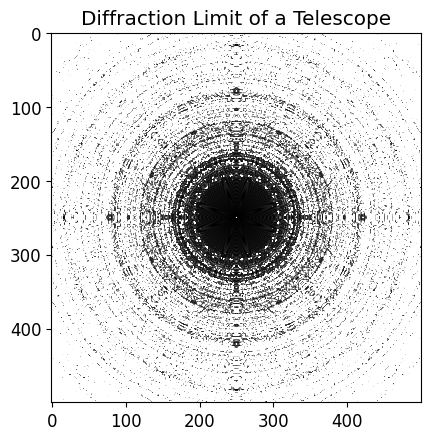

<ipython-input-25-6e6c5f446b70>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.empty([pts,pts],np.float)
<ipython-input-25-6e6c5f446b70>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(J,0,np.pi,args=(x))[0]
<ipython-input-25-6e6c5f446b70>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling t

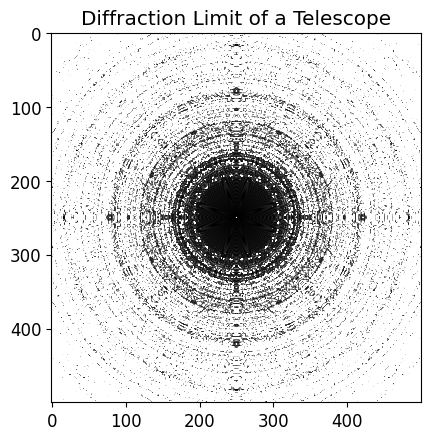

In [25]:
def J(u,x):
  m=1
  return (1/np.pi)*np.cos(m*u-x*np.sin(u))

def J_quad(x):
  return quad(J,0,np.pi,args=(x))[0]

def I(lmda,r):
  k=2*np.pi/lmda
  return (J_quad(k*r)/k*r)**2  
   
lmda = .5        # microm meters
I0 = 1
pts = 500           
interval = 0.8

arr = np.empty([pts,pts],np.float)

for i in range(pts):
    y = interval*(i-pts/2)
    for j in range(pts):
        x = interval*(j-pts/2)
        r = np.sqrt((x)**2+(y)**2)

        if r < 0.000000000001:
            arr[i,j]= 0.5 #this is the lim as r  -> 0, I -> 0.5
        else: 
            arr[i,j] = I0*I(lmda,r)

imshow(arr,vmax=0.1,cmap='hot')
plt.title('Diffraction Limit of a Telescope')
gray()
show()


## 3. Newman 3.6 page 120: Logistic map and deterministic chaos

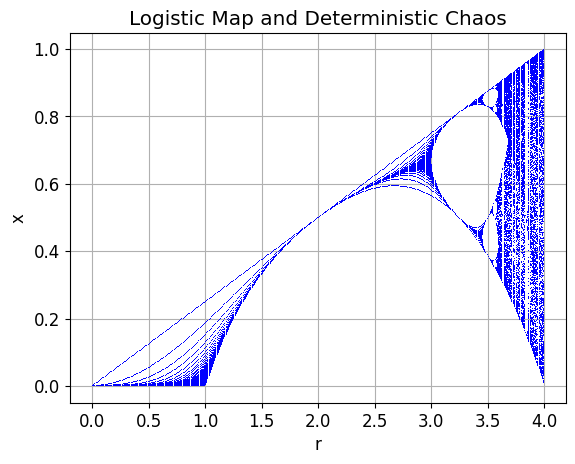

In [8]:
r = np.arange(0,4,0.01)
x = np.full_like(r,0.5)

for i in r:
    x = r*x*(1-x)
    plt.plot(r,x,"b,")
plt.title("Logistic Map and Deterministic Chaos")
plt.ylabel("x")
plt.xlabel("r")
plt.grid()

## 4. Solving ODEs: Euler algorithm for the Simple Harmonic Oscillator

### a

x:[0.1     0.1     0.099   0.097   0.09401]
v:[ 0.    -0.1   -0.2   -0.299 -0.396]
t:[0.   0.01 0.02 0.03 0.04]


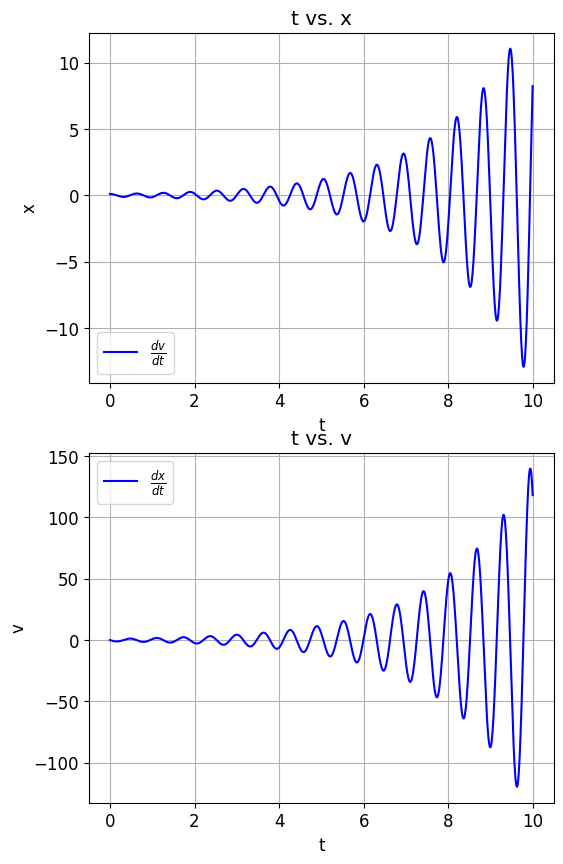

In [9]:
a=0
b=10
N=1000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
    x[t] += x[t-1] + h*v[t-1]
    v[t] += v[t-1] + h*(-k/m)*x[t-1]
print(f'x:{x[0:5]}\nv:{v[0:5]}\nt:{tpoints[0:5]}')
plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,x, 'b-', label = r'$\frac{dv}{dt}$')
plt.title('t vs. x')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower left')
plt.grid()

plt.subplot(212)
plt.plot(tpoints,v, 'b-', label = r'$\frac{dx}{dt}$')
plt.title('t vs. v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend(loc='upper left')
plt.grid()

### b

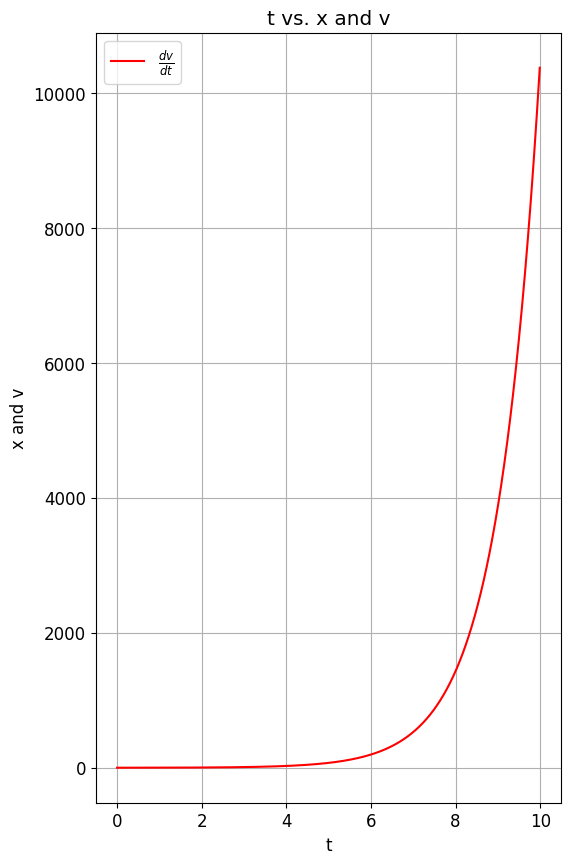

In [10]:
kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.plot(tpoints,total, 'r-', label = r'$\frac{dv}{dt}$')
plt.title('t vs. x and v')
plt.xlabel('t')
plt.ylabel('x and v')
plt.legend()
plt.grid()

### c

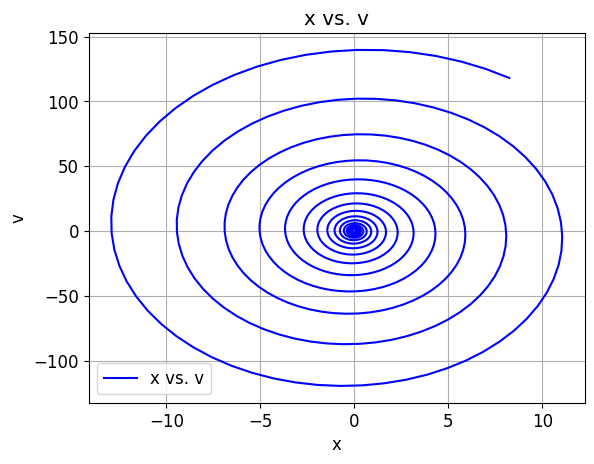

In [11]:
plt.plot(x,v, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()

### d

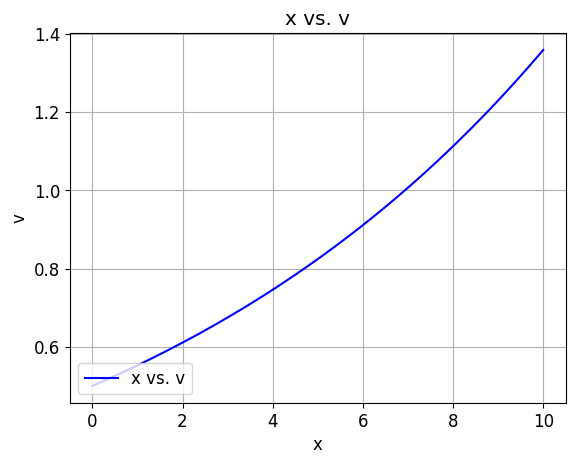

In [12]:
a=0
b=10
N=10000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
    x[t] += x[t-1] + h*v[t-1]
    v[t] += v[t-1] + h*(-k/m)*x[t-1]

kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.plot(tpoints,total, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()    

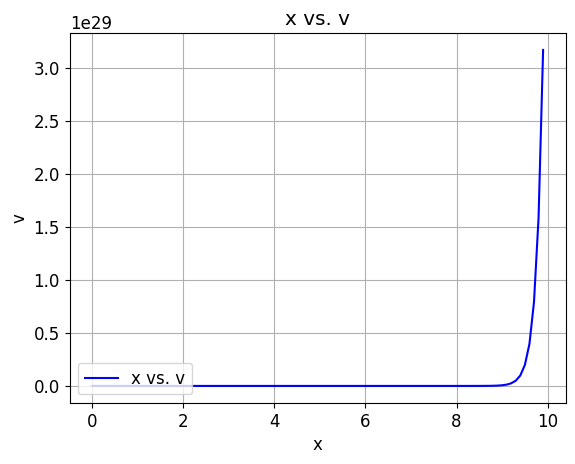

In [13]:
a=0
b=10
N=100
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
    x[t] += x[t-1] + h*v[t-1]
    v[t] += v[t-1] + h*(-k/m)*x[t-1]

kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.plot(tpoints,total, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()      

### e

It looks like the accuracy decreases with more data points.

## 5. Solving ODEs: Euler-Cromer algorithm

### a

x:[0.1       0.099     0.09701   0.0940499 0.0901493]
v:[ 0.        -0.1       -0.199     -0.29601   -0.3900599]
t:[0.   0.01 0.02 0.03 0.04]


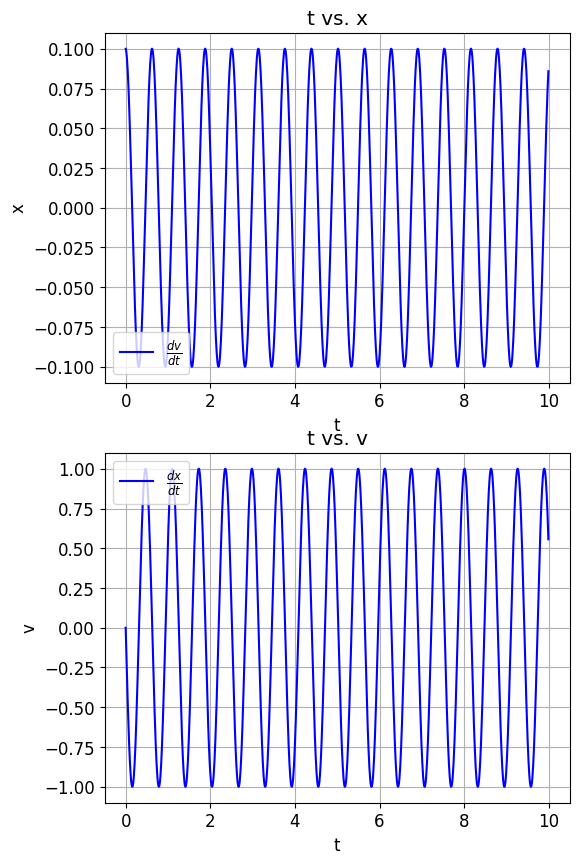

In [14]:
a=0
b=10
N=1000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
    v[t] += v[t-1] + h*(-k/m)*x[t-1]
    x[t] += x[t-1] + h*v[t]

print(f'x:{x[0:5]}\nv:{v[0:5]}\nt:{tpoints[0:5]}')
plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,x, 'b-', label = r'$\frac{dv}{dt}$')
plt.title('t vs. x')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower left')
plt.grid()

plt.subplot(212)
plt.plot(tpoints,v, 'b-', label = r'$\frac{dx}{dt}$')
plt.title('t vs. v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend(loc='upper left')
plt.grid()

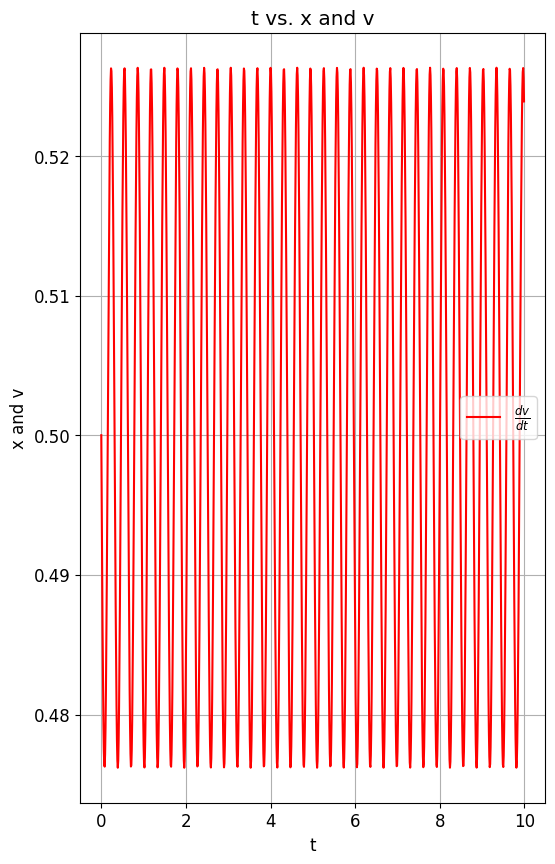

In [15]:
kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.plot(tpoints,total, 'r-', label = r'$\frac{dv}{dt}$')
plt.title('t vs. x and v')
plt.xlabel('t')
plt.ylabel('x and v')
plt.legend()
plt.grid()

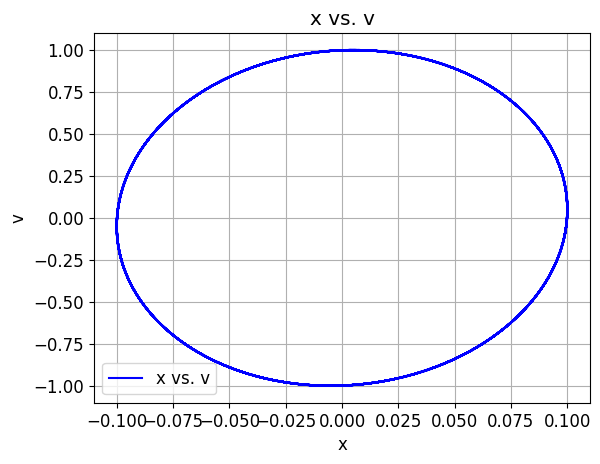

In [16]:
plt.plot(x,v, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()

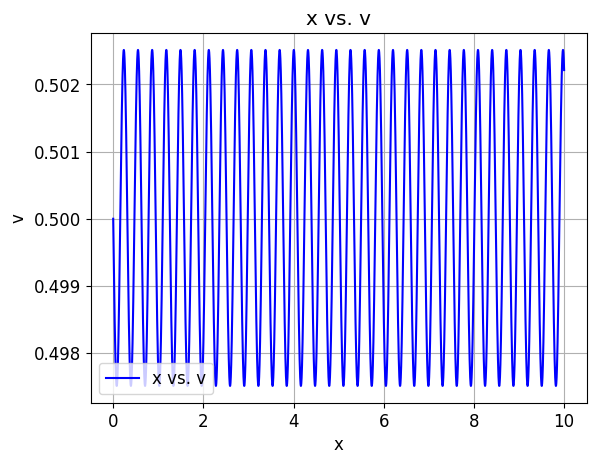

In [17]:
a=0
b=10
N=10000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
    v[t] += v[t-1] + h*(-k/m)*x[t-1]
    x[t] += x[t-1] + h*v[t]

kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.plot(tpoints,total, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()    

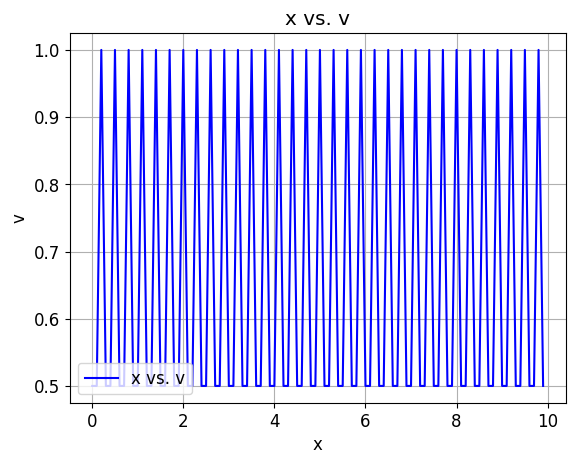

In [18]:
a=0
b=10
N=100
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
    v[t] += v[t-1] + h*(-k/m)*x[t-1]
    x[t] += x[t-1] + h*v[t]

kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.plot(tpoints,total, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()  

## 6. 2nd order Runge-Kutta algorithm

x:[0.1        0.0995     0.0980025  0.09552249 0.0920848 ]
v:[ 0.         -0.1        -0.199      -0.2960075  -0.39004995]
t:[0.   0.01 0.02 0.03 0.04]


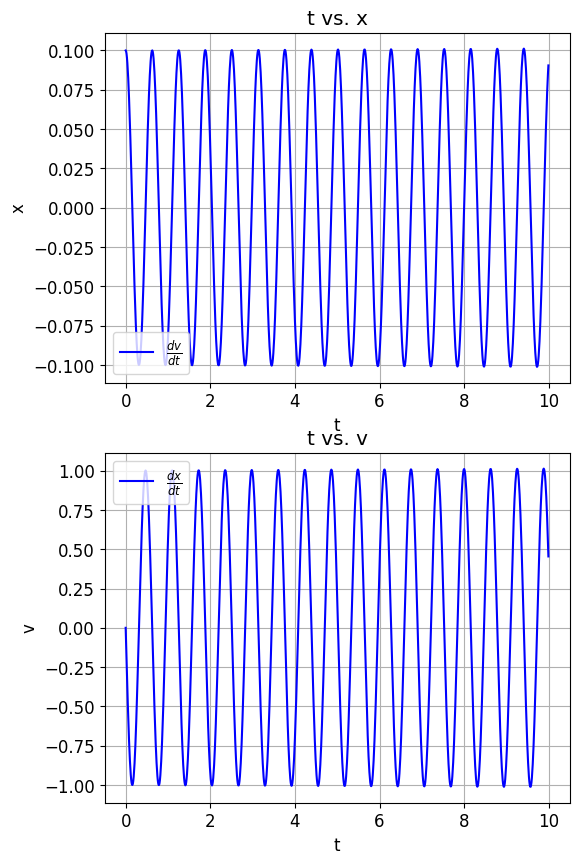

In [19]:
a=0
b=10
N=1000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
  xmid = x[t-1]+(h/2)*v[t-1]
  vmid = v[t-1]+(h/2)*(-k/m)*x[t-1] 
  x[t] += x[t-1] + h*vmid
  v[t] += v[t-1] + h*(-k/m)*xmid
    
print(f'x:{x[0:5]}\nv:{v[0:5]}\nt:{tpoints[0:5]}')
plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,x, 'b-', label = r'$\frac{dv}{dt}$')
plt.title('t vs. x')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower left')
plt.grid()

plt.subplot(212)
plt.plot(tpoints,v, 'b-', label = r'$\frac{dx}{dt}$')
plt.title('t vs. v')
plt.xlabel('t')
plt.ylabel('v')
plt.legend(loc='upper left')
plt.grid()

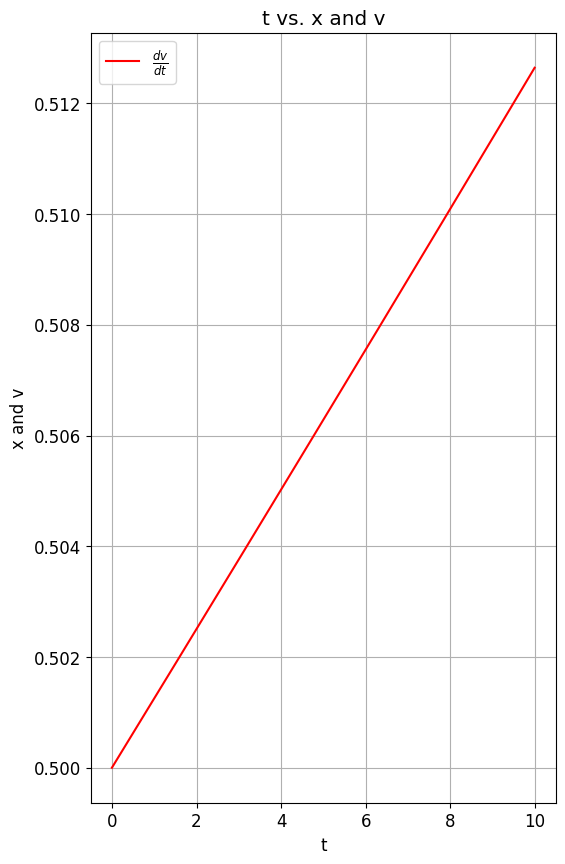

In [20]:
kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.plot(tpoints,total, 'r-', label = r'$\frac{dv}{dt}$')
plt.title('t vs. x and v')
plt.xlabel('t')
plt.ylabel('x and v')
plt.legend()
plt.grid()

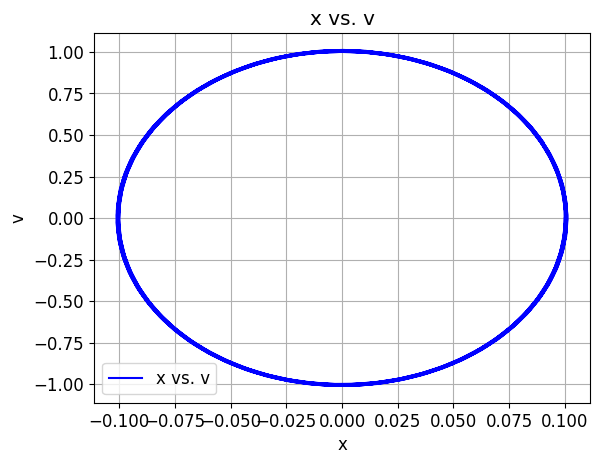

In [21]:
plt.plot(x,v, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()

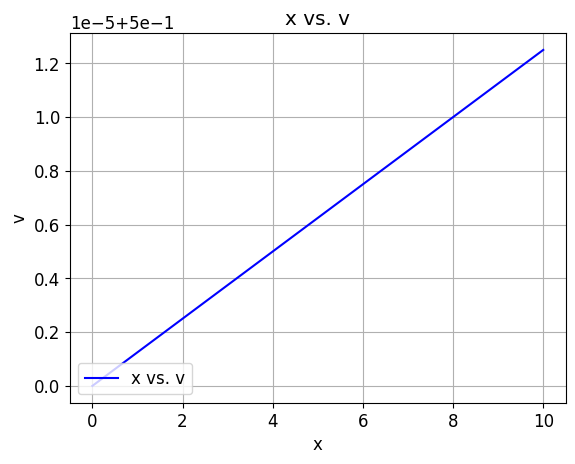

In [22]:
a=0
b=10
N=10000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
  xmid = x[t-1]+(h/2)*v[t-1]
  vmid = v[t-1]+(h/2)*(-k/m)*x[t-1] 
  x[t] += x[t-1] + h*vmid
  v[t] += v[t-1] + h*(-k/m)*xmid

kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.plot(tpoints,total, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()   

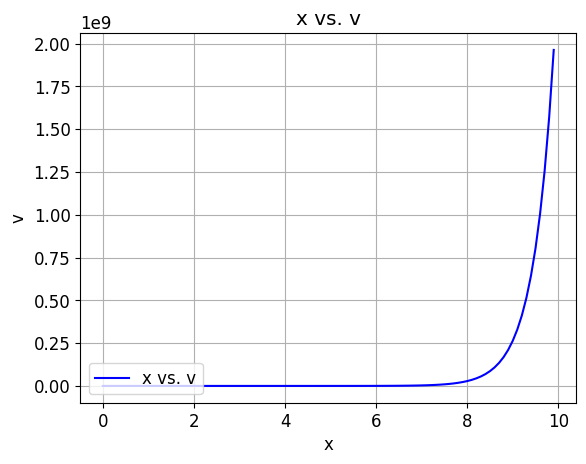

In [23]:
a=0
b=10
N=100
h=(b-a)/N 
tpoints=np.arange(a,b,h)
k=100
m=1
x0=0.1
v0=0
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
for t in range(1,N):
  xmid = x[t-1]+(h/2)*v[t-1]
  vmid = v[t-1]+(h/2)*(-k/m)*x[t-1] 
  x[t] += x[t-1] + h*vmid
  v[t] += v[t-1] + h*(-k/m)*xmid

kinetic=0.5*m*v**2
potential=0.5*k*x**2
total=kinetic+potential

plt.plot(tpoints,total, 'b-', label = r'x vs. v')
plt.title('x vs. v')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='lower left')
plt.grid()   